In [ ]:
#importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np

np.random.seed(42)

# Número de registros
n_registros = 10000

# Generamos los datos simulados
data = {
    'src_ip': [f"192.168.1.{np.random.randint(1, 100)}" for _ in range(n_registros)],  # Dirección IP de origen
    'dst_ip': [f"10.0.0.{np.random.randint(1, 50)}" for _ in range(n_registros)],     # Dirección IP de destino
    'protocol': np.random.choice(['TCP', 'UDP', 'ICMP'], size=n_registros),           # Protocolo de red
    'port': np.random.randint(1, 65535, size=n_registros),                            # Puerto de destino
    'bytes': np.random.randint(100, 10000, size=n_registros),                         # Bytes transferidos
    'duration': np.random.uniform(0.1, 60.0, size=n_registros),                       # Duración de la conexión
    'label': np.random.choice([0, 1], size=n_registros, p=[0.8, 0.2])                 # Etiquetas (0: normal, 1: malicioso)
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
print(df.head())


# Verificamos valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminamos filas con valores nulos (si las hay)
df = df.dropna()

# Verificamos los duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Eliminamos los duplicados
df = df.drop_duplicates()

# Codificamos las variables categóricas (si es necesario)
from sklearn.preprocessing import LabelEncoder

# Codificamos la columna 'protocol'
label_encoder = LabelEncoder()
df['protocol'] = label_encoder.fit_transform(df['protocol'])

# Verificamos la codificación
print("\nValores únicos en 'protocol':", df['protocol'].unique())

# Normalizamos las características numéricas (si es necesario)
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Escalamos las características numéricas
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Mostramos las primeras filas después de la limpieza
print("\nDatos limpios y transformados:")
print(df.head())


# Guardamos los datos limpios
df.to_csv('datos_limpios.csv', index=False)

# Verificamos que el archivo se ha guardado correctamente
import os
print("\nArchivos en el directorio actual:", os.listdir())

# Cargar el archivo limpio para verificación
df_cleaned = pd.read_csv('datos_limpios.csv')
print("\nPrimeras filas del archivo limpio:")
print(df_cleaned.head())

In [3]:
# Guardar los datos limpios en un archivo CSV
df.to_csv('datos_limpios.csv', index=False)

# Verificar que el archivo se ha guardado correctamente
import os
print("Archivos en el directorio actual:", os.listdir())

from google.colab import files

# Descargar el archivo "datos_limpios.csv"
files.download('datos_limpios.csv')

Archivos en el directorio actual: ['.config', 'datos_limpios.csv', 'sample_data']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:

import pandas as pd

# Cargar los datos limpios
df = pd.read_csv('datos_limpios.csv')

# Mostrar las primeras filas
print(df.head())

# Resumen estadístico de las variables numéricas
print(df.describe())

# Resumen de las variables categóricas
print(df['protocol'].value_counts())
print(df['label'].value_counts())

         src_ip     dst_ip  protocol      port     bytes  duration     label
0  192.168.1.52  10.0.0.18 -0.005496  0.838091 -0.025744 -0.475179 -0.504839
1  192.168.1.93  10.0.0.45 -1.226753 -0.500366  1.176283  1.644108  1.980829
2  192.168.1.15  10.0.0.44  1.215762 -0.640539 -1.486873 -1.696023 -0.504839
3  192.168.1.72  10.0.0.27 -1.226753 -1.224896 -0.698361  1.500890  1.980829
4  192.168.1.61  10.0.0.49  1.215762  0.879312  0.182239  1.575804 -0.504839
           protocol          port         bytes      duration         label
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04
mean   3.979039e-17 -6.323830e-17  1.300293e-16 -1.236344e-16  2.700062e-17
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00
min   -1.226753e+00 -1.703144e+00 -1.733021e+00 -1.721362e+00 -5.048392e-01
25%   -1.226753e+00 -8.777822e-01 -8.659897e-01 -8.584525e-01 -5.048392e-01
50%   -5.495658e-03 -9.867091e-03 -9.112364e-03 -3.601005e-03 -5.048392e-01
75%   

<ipython-input-11-022783de09e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df, palette='viridis')


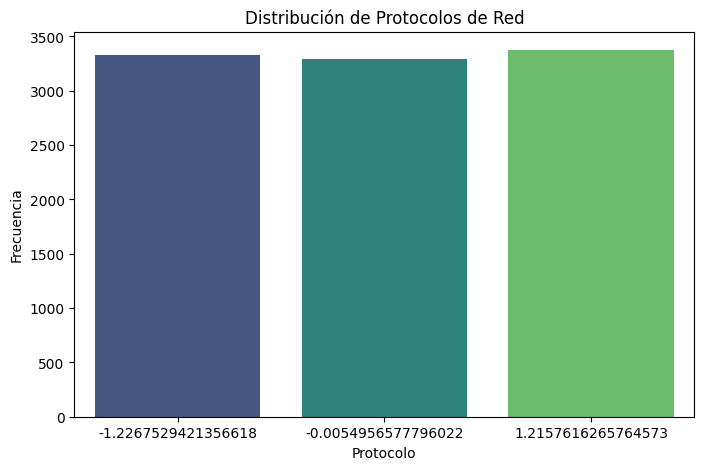

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para la distribución de protocolos
plt.figure(figsize=(8, 5))
sns.countplot(x='protocol', data=df, palette='viridis')
plt.title('Distribución de Protocolos de Red')
plt.xlabel('Protocolo')
plt.ylabel('Frecuencia')
plt.show()

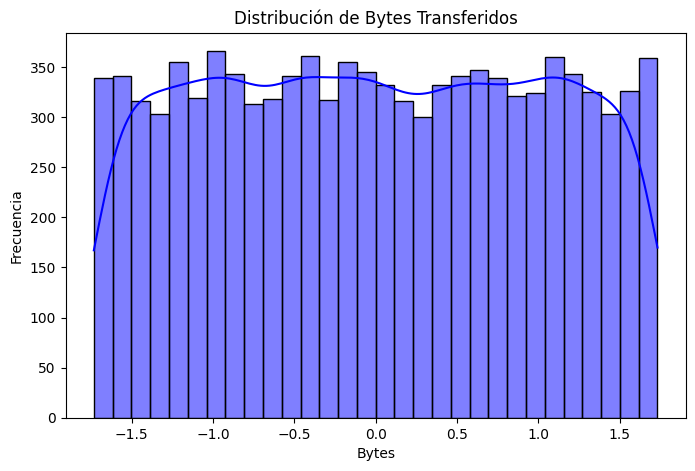

In [12]:
# Histograma de la columna 'bytes'
plt.figure(figsize=(8, 5))
sns.histplot(df['bytes'], bins=30, kde=True, color='blue')
plt.title('Distribución de Bytes Transferidos')
plt.xlabel('Bytes')
plt.ylabel('Frecuencia')
plt.show()


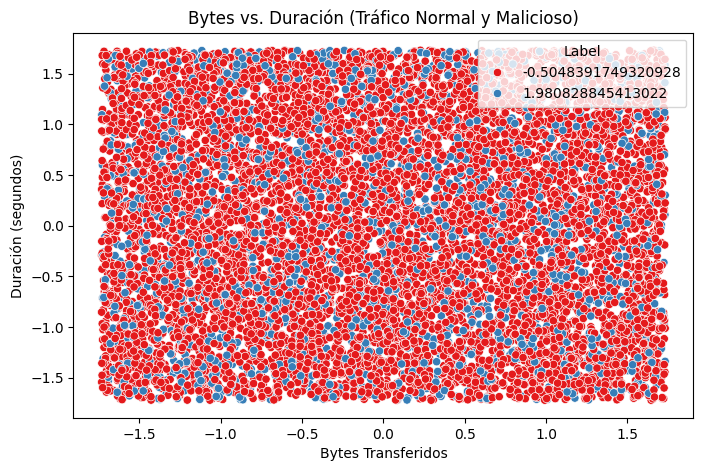

In [13]:
# Gráfico de dispersión: Bytes vs. Duración
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bytes', y='duration', hue='label', data=df, palette='Set1')
plt.title('Bytes vs. Duración (Tráfico Normal y Malicioso)')
plt.xlabel('Bytes Transferidos')
plt.ylabel('Duración (segundos)')
plt.legend(title='Label', loc='upper right')
plt.show()

<ipython-input-14-9a43fec79870>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


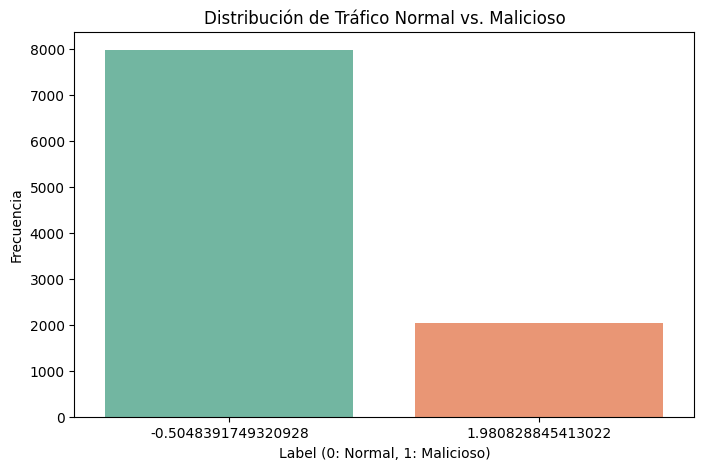

In [14]:
# Gráfico de barras para la distribución de tráfico normal y malicioso
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribución de Tráfico Normal vs. Malicioso')
plt.xlabel('Label (0: Normal, 1: Malicioso)')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
#regresión lógica
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características (X) y etiquetas (y)
# Excluimos las columnas 'src_ip' y 'dst_ip' porque no son útiles para el modelado
X = df.drop(['label', 'src_ip', 'dst_ip'], axis=1)  # Características (excluyendo IPs)
y = df['label']                                     # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar el conjunto de entrenamiento
X_test = scaler.transform(X_test)        # Transformar el conjunto de prueba (sin ajustar)

# Verificar las dimensiones de los conjuntos de datos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (8000, 4)
Dimensiones de X_test: (2000, 4)
Dimensiones de y_train: (8000,)
Dimensiones de y_test: (2000,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar el modelo de regresión logica
log_reg = LogisticRegression()

# Asegurarse de que y_train contenga solo valores enteros (0 y 1)
y_train = y_train.astype(int)

# Entrenar el modelo con y_train convertido a enteros
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)

# Convertir y_test a enteros explícitamente
y_test = y_test.astype(int)

# Evaluar el modelo
print("Regresión Logíca:")
print("Precisión:", accuracy_score(y_test, y_pred_log_reg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log_reg))

Regresión Logíca:
Precisión: 0.7865
Matriz de Confusión:
 [[1573    0]
 [ 427    0]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1573
           1       0.00      0.00      0.00       427

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.69      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Árbol de Decisión:")
print("Precisión:", accuracy_score(y_test, y_pred_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_tree))

In [ ]:
#regresión lógica optimizada
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Asignar pesos inversamente proporcionales a la frecuencia de las clases
class_weights = {0: 1, 1: 5}  # Ajusta los pesos según sea necesario

# Entrenar el modelo con pesos de clase
log_reg = LogisticRegression(class_weight=class_weights)
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)

# Evaluar el modelo
print("Regresión Logíca con Pesos de Clase:")
print("Precisión:", accuracy_score(y_test, y_pred_log_reg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log_reg))


#Optimización de Hiperparámetros logica
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'C': [0.01, 0.1, 1, 10, 100],  # Fuerza de la regularización
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5}]  # Pesos de clase
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros para Regresión Logíca:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_log_reg = grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)

# Evaluar el modelo optimizado
print("Regresión Logíca Optimizada:")
print("Precisión:", accuracy_score(y_test, y_pred_best_log_reg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_best_log_reg))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_best_log_reg))


# Manejo del Desequilibrio de Clases arbol de decisión
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenamos el modelo con datos balanceados
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_smote, y_train_smote)

# Predecir en el conjunto de prueba
y_pred_tree = tree.predict(X_test)

# Evaluamos el modelo
print("Árbol de Decisión con SMOTE:")
print("Precisión:", accuracy_score(y_test, y_pred_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_tree))

# Optimización de Hiperparámetros arbol de decisión

from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5}]  # Pesos de clase
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros para Árbol de Decisión:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_tree = grid_search.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)

# Evaluar el modelo optimizado
print("Árbol de Decisión Optimizado:")
print("Precisión:", accuracy_score(y_test, y_pred_best_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_best_tree))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_best_tree))